In [1]:
!ls

Challenges			     master_list_school_dict.p
csvfile.csv			     student_data_df
Luther_playground.ipynb		     student_data_df_pickle
Luther_School_Data_Collection.ipynb  Untitled.ipynb


In [2]:
import pandas as pd
import pickle

In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

%matplotlib inline

/home/farhaan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
student_data_df_raw = pickle.load(open('student_data_df_pickle',"rb"))

In [5]:
student_data_df_raw

Hispanic_White_Achievement_Gap  black_students  black_teachers  \
0                             -14.0            26.3             4.1   
1                             -29.0            84.8            21.8   
2                              -4.0             2.9             1.6   
3                             -30.0             1.5             0.9   
4                              -5.0            42.5            21.8   
5                              -3.0             1.8             0.0   
6                              -8.0             5.0             0.4   
7                              -4.0            11.1            21.8   
8                             -15.0             2.2             1.6   
9                              -8.0             0.0             0.0   
10                             -4.0            15.4             0.8   
11                            -28.0            45.3             4.5   
12                            -28.0             1.6             0.2   
13                            -28.0             1.6             0.2   
14                            -12.0             5.0             2.1   
15                            -19.0             2.5             1.0   
16                             -2.0             7.7             2.6   
17                             -6.0             2.3             0.0   
18                            -25.0            39.3             1.1   
19                            -20.0            35.5             1.1   
20                             -5.0             3.0             0.0   
21                             -9.0             3.1             0.0   
22                             -8.0            59.8            17.5   
23                             -7.0            23.8             5.7   
24                             -8.0            29.0             5.1   
25                            -29.0            80.7            21.8   
26                            -10.0            11.0             0.0   
27                              0.0            25.2             9.7   
28                            -26.0             1.7             1.3   
29                              0.0             3.6             0.8   
..                              ...             ...             ...   
198                           -13.0            15.1            21.8   
199                           -12.0             4.0             0.6   
200                            -6.0             7.3             2.1   
201                           -13.0             3.5             0.8   
202                           -17.0             2.4            21.8   
203                           -11.0            62.8            13.7   
204                           -12.0            25.5             9.7   
205                            -6.0            10.9             2.1   
206                            -5.0            35.6             7.5   
207                           -12.0             2.7             0.4   
208                            -8.0             4.1             0.4   
209                           -26.0            11.2            21.8   
210                           -15.0            10.4             2.0   
211                            -9.0            13.5             2.8   
212                            -6.0             1.3             0.7   
213                            -9.0            15.0             3.9   
214                            -7.0            12.2             3.2   
215                            -2.0             1.5             0.6   
216                           -10.0             5.6             2.0   
217                            -7.0             7.1             0.7   
218                            -2.0             5.9             0.7   
219                           -30.0             2.3             1.3   
220                           -14.0             9.3             1.6   
221                            -1.0             2.8             2.2   
222                          

In [6]:
student_data_df_raw.shape

(228, 8)

In [7]:
list(student_data_df_raw.columns)

['Hispanic_White_Achievement_Gap',
 'black_students',
 'black_teachers',
 'hispanic_students',
 'hispanic_teachers',
 'school_name',
 'white_students',
 'white_teachers']

In [8]:
student_data_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 8 columns):
Hispanic_White_Achievement_Gap    228 non-null float64
black_students                    228 non-null float64
black_teachers                    228 non-null float64
hispanic_students                 228 non-null float64
hispanic_teachers                 228 non-null float64
school_name                       228 non-null object
white_students                    228 non-null float64
white_teachers                    228 non-null float64
dtypes: float64(7), object(1)
memory usage: 14.3+ KB


In [9]:
student_data_df_raw.head()

Hispanic_White_Achievement_Gap  black_students  black_teachers  \
0                           -14.0            26.3             4.1   
1                           -29.0            84.8            21.8   
2                            -4.0             2.9             1.6   
3                           -30.0             1.5             0.9   
4                            -5.0            42.5            21.8   

   hispanic_students  hispanic_teachers  \
0               19.9                4.6   
1               13.9               16.3   
2               61.1                4.5   
3                7.6                0.4   
4               42.2               16.3   

                                school_name  white_students  white_teachers  
0      A B SHEPARD HIGH SCH (CAMPUS) (9-12)            50.6            90.5  
1  ACE TECHNICAL CHARTER HIGH SCHOOL (9-12)             1.2            51.4  
2          ADDISON TRAIL HIGH SCHOOL (9-12)            30.7            86.8  
3      ADLAI E STEVENSON HIGH SCHOOL (9-12)            63.4            94.2  
4         AIR FORCE ACAD HIGH SCHOOL (9-12)            11.0            51.4

While scraping, the program had stalled twice due to not allowing enough times for elements to load before searching for them. Due to this there were some duplicate rows in the dataframe.

In [10]:
student_data_df_raw.drop_duplicates(inplace=True)

In [11]:
student_data_df_raw.corr()

Hispanic_White_Achievement_Gap  \
Hispanic_White_Achievement_Gap                        1.000000   
black_students                                       -0.166478   
black_teachers                                       -0.168370   
hispanic_students                                     0.138470   
hispanic_teachers                                    -0.129539   
white_students                                        0.033445   
white_teachers                                        0.210227   

                                black_students  black_teachers  \
Hispanic_White_Achievement_Gap       -0.166478       -0.168370   
black_students                        1.000000        0.571722   
black_teachers                        0.571722        1.000000   
hispanic_students                    -0.145378        0.306391   
hispanic_teachers                     0.226446        0.710031   
white_students                       -0.613120       -0.680863   
white_teachers                       -0.380713       -0.840897   

                                hispanic_students  hispanic_teachers  \
Hispanic_White_Achievement_Gap           0.138470          -0.129539   
black_students                          -0.145378           0.226446   
black_teachers                           0.306391           0.710031   
hispanic_students                        1.000000           0.599360   
hispanic_teachers                        0.599360           1.000000   
white_students                          -0.651379          -0.670874   
white_teachers                          -0.431511          -0.773703   

                                white_students  white_teachers  
Hispanic_White_Achievement_Gap        0.033445        0.210227  
black_students                       -0.613120       -0.380713  
black_teachers                       -0.680863       -0.840897  
hispanic_students                    -0.651379       -0.431511  
hispanic_teachers                    -0.670874       -0.773703  
white_students                        1.000000        0.650665  
white_teachers                        0.650665        1.000000

In [12]:
y,X1,X2,X3,X4,X5,X6 = list(student_data_df_raw.corr().columns)
(y,X1,X2,X3,X4,X5,X6)

('Hispanic_White_Achievement_Gap',
 'black_students',
 'black_teachers',
 'hispanic_students',
 'hispanic_teachers',
 'white_students',
 'white_teachers')

Unfortunately, Illinois Report Card did not have data for teacher demographics by school, only by district. So, a large school district like chicago which have schools very diverse in teacher populations from each other will not contribute positively to our model.
Doing a quick check of sorting by the number of entries with identical teacher demographics, yields one row with a much larger count than others. 27 schools are represented by that combination of teacher demographics (21.8,16.3,51.4). The next highest count is 5.

Checking against the public records on the source website confirms that these are schools belonging to the Chicago Public Schools (CPS) system.
To maintain the validity of our data, we should remove all data associated with CPS schools.

In [13]:
print("Total number of schools:",len(student_data_df_raw))
check_large_districts_df = student_data_df_raw.groupby([X2,X4,X6],as_index=False)[y].count()
check_large_districts_df.sort_values([y],ascending=False).head()

Total number of schools: 225


black_teachers  hispanic_teachers  white_teachers  \
128            21.8               16.3            51.4   
97              2.2                5.6            88.0   
109             4.5                2.4            86.2   
94              2.1               18.6            77.2   
81              1.3                5.1            88.6   

     Hispanic_White_Achievement_Gap  
128                              27  
97                                5  
109                               5  
94                                5  
81                                5

In [14]:
len(student_data_df_raw)

225

Below are the schools in the group of 27. A google search will confirm that all of these schools are indeed within CPS.

In [15]:
student_data_df_raw[(student_data_df_raw[X2]==21.8)&(student_data_df_raw[X4]==16.3)&(student_data_df_raw[X6]==51.4)]

Hispanic_White_Achievement_Gap  black_students  black_teachers  \
1                             -29.0            84.8            21.8   
4                              -5.0            42.5            21.8   
7                              -4.0            11.1            21.8   
25                            -29.0            80.7            21.8   
35                             -8.0            41.3            21.8   
36                            -17.0            54.9            21.8   
47                            -19.0            20.9            21.8   
70                            -29.0            57.7            21.8   
91                             -3.0             5.6            21.8   
94                            -25.0             6.7            21.8   
102                           -32.0            16.2            21.8   
105                           -12.0             3.6            21.8   
106                           -29.0            86.4            21.8   
110                           -10.0            13.0            21.8   
113                           -16.0             8.4            21.8   
119                            -6.0            24.0            21.8   
134                            -2.0            13.2            21.8   
142                           -29.0            94.2            21.8   
157                           -35.0            33.4            21.8   
179                             0.0            11.2            21.8   
188                            -4.0            12.7            21.8   
192                            -3.0            10.2            21.8   
193                           -33.0            29.0            21.8   
198                           -13.0            15.1            21.8   
202                           -17.0             2.4            21.8   
209                           -26.0            11.2            21.8   
226                            -8.0            22.3            21.8   

     hispanic_students  hispanic_teachers  \
1                 13.9               16.3   
4                 42.2               16.3   
7                 59.1               16.3   
25                18.3               16.3   
35                18.7               16.3   
36                18.2               16.3   
47                51.2               16.3   
70                39.9               16.3   
91                90.6               16.3   
94                83.5               16.3   
102               29.9               16.3   
105               69.0               16.3   
106                4.8               16.3   
110               67.3               16.3   
113               42.3               16.3   
119               33.0               16.3   
134               35.3               16.3   
142                1.6               16.3   
157               28.9               16.3   
179               73.0               16.3   
188               72.6               16.3   
192               80.4               16.3   
193               42.0               16.3   
198               71.6               16.3   
202               39.3               16.3   
209               55.9               16.3   
226               27.8               16.3   

                                  school_name  white_students  white_teachers  
1    ACE TECHNICAL CHARTER HIGH SCHOOL (9-12)             1.2            51.4  
4           AIR FORCE ACAD HIGH SCHOOL (9-12)            11.0            51.4  
7                 AMUNDSEN HIGH SCHOOL (9-12)            12.3            51.4  
25                   BOWEN HIGH SCHOOL (9-12)             0.2            51.4  
35    CHICAGO HS FOR AGRICULT SCIENCES (9-12)            36.7            51.4  
36      CHICAGO VIRTUAL CHARTER SCHOOL (K-12)            16.0            51.4  
47                 DISNEY II MAGNET HS (7-12)            21.2            51.4  
70               GOODE STEM ACADEMY HS (9-12)             1.0            51.4  
91                 HUBBARD HIGH SCH

Let's filter out CPS schools from the dataframe

In [16]:
schools_no_cps_df = student_data_df_raw[(student_data_df_raw[X2]!=21.8)&(student_data_df_raw[X4]!=16.3)&(student_data_df_raw[X6]!=51.4)]
print("Total number of schools in new filtered dataframe:",len(schools_no_cps_df))

Total number of schools in new filtered dataframe: 198


In [17]:
#Running the correlations between variables again:
schools_no_cps_df.corr()

Hispanic_White_Achievement_Gap  \
Hispanic_White_Achievement_Gap                        1.000000   
black_students                                        0.035698   
black_teachers                                        0.074169   
hispanic_students                                     0.175320   
hispanic_teachers                                     0.101418   
white_students                                       -0.133717   
white_teachers                                        0.032107   

                                black_students  black_teachers  \
Hispanic_White_Achievement_Gap        0.035698        0.074169   
black_students                        1.000000        0.738804   
black_teachers                        0.738804        1.000000   
hispanic_students                    -0.133475        0.012861   
hispanic_teachers                    -0.025081        0.130193   
white_students                       -0.611993       -0.546491   
white_teachers                       -0.280299       -0.459299   

                                hispanic_students  hispanic_teachers  \
Hispanic_White_Achievement_Gap           0.175320           0.101418   
black_students                          -0.133475          -0.025081   
black_teachers                           0.012861           0.130193   
hispanic_students                        1.000000           0.620390   
hispanic_teachers                        0.620390           1.000000   
white_students                          -0.651670          -0.508351   
white_teachers                          -0.298466          -0.364380   

                                white_students  white_teachers  
Hispanic_White_Achievement_Gap       -0.133717        0.032107  
black_students                       -0.611993       -0.280299  
black_teachers                       -0.546491       -0.459299  
hispanic_students                    -0.651670       -0.298466  
hispanic_teachers                    -0.508351       -0.364380  
white_students                        1.000000        0.470694  
white_teachers                        0.470694        1.000000

Notice that the strongest positive correlations amongst the inputs are:

    - black_students/black_teacher(0.7388)
    - hispanic_students/hispanic_teachers(0.6204)
    - white_students/white_teachers (0.471)

This could possibly indicate:
- a preference of teachers to work with students of a similar ethnic background.
- a preference of administrators to hire teachers that share a common culture with the school's student population.
- a preference of white teachers to not work in schools with high concentrations of minority students (not for the obvious nefarious p)

**Doing a pairplot to visualize multicollinearity.**

Doesn't seem to be too great of of a multicollinearity between any of the inputs of interest. The only thing to note is that we accept the percentage of black teachers plus hispanic teachers should be negatively correlated with the percentage of white teachers since the total percentage of teachers cannot exceed 100%.

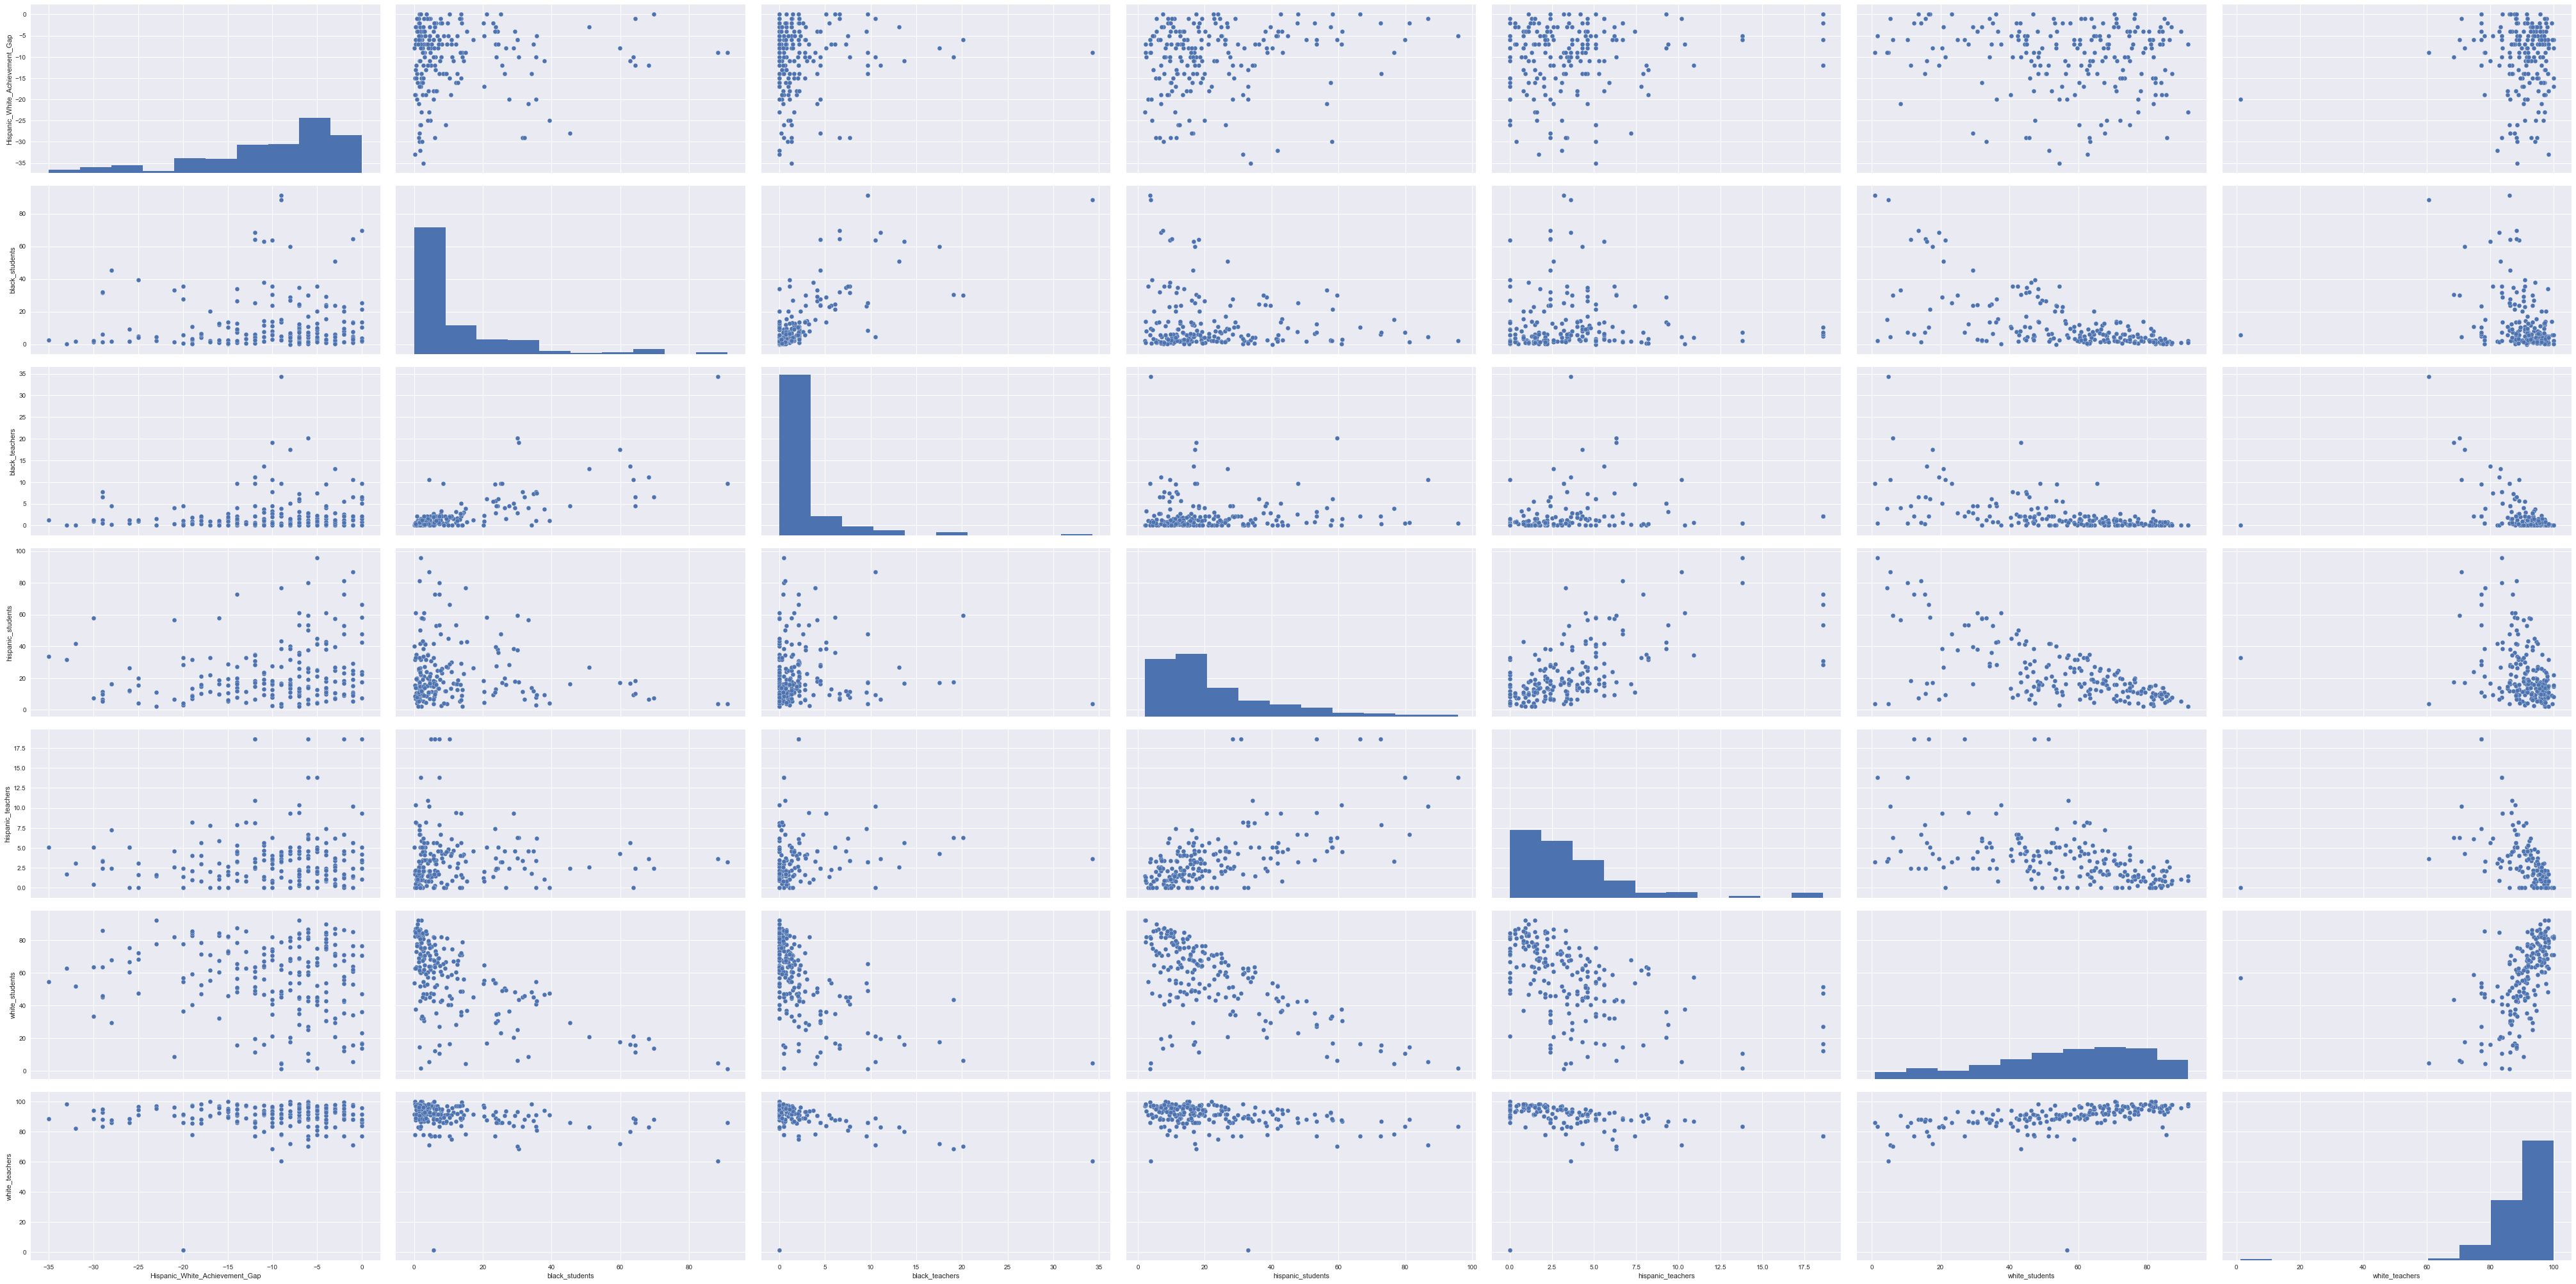

In [18]:
sns.pairplot(schools_no_cps_df, aspect=2, size=4)

In [19]:
schools_no_cps_df.columns

Index(['Hispanic_White_Achievement_Gap', 'black_students', 'black_teachers',
       'hispanic_students', 'hispanic_teachers', 'school_name',
       'white_students', 'white_teachers'],
      dtype='object')

In [20]:
# drop school_name column and rename the columns for ease of use
schools_no_name_df = schools_no_cps_df.loc[:,['Hispanic_White_Achievement_Gap', 'black_students', 'black_teachers',
       'hispanic_students', 'hispanic_teachers','white_students', 'white_teachers']]

"""
y : 'Hispanic_White_Achievement_Gap'
X1: 'black_students'
X2: 'black_teachers'
X3: 'hispanic_students'
X4: 'hispanic_teachers'
X5: 'white_students'
X6: 'white_teachers'
"""
schools_no_name_df.columns = ['y','X1','X2','X3','X4','X5','X6']
schools_no_name_df.head()

y    X1   X2    X3   X4    X5    X6
0 -14.0  26.3  4.1  19.9  4.6  50.6  90.5
2  -4.0   2.9  1.6  61.1  4.5  30.7  86.8
3 -30.0   1.5  0.9   7.6  0.4  63.4  94.2
5  -3.0   1.8  0.0  24.8  2.8  71.7  94.4
6  -8.0   5.0  0.4  15.1  0.8  75.6  98.3

Let's now run a Ordinary Least Square Linear Regression on the data using statsmodel

In [21]:
# Creating strings of variable names for input into patsy
y_string = list(schools_no_name_df.columns)[0]
X_string = list(schools_no_name_df.columns)[1:]
X_string = ' + '.join(X_string)

In [22]:
y, X = patsy.dmatrices(y_string+' ~ '+X_string, data=schools_no_name_df, return_type="dataframe")
#Performing an 'Ordinary Least Square Regression' on our data
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.011
Date:                Fri, 21 Jul 2017   Prob (F-statistic):             0.0661
Time:                        08:21:44   Log-Likelihood:                -683.29
No. Observations:                 198   AIC:                             1381.
Df Residuals:                     191   BIC:                             1404.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.7344     10.275     -3.186      0.002     -53.002     -12.467
X1             0.0830      0.103      0.808      0.420      -0.120       0.286
X2             0.2675      0.219      1.222      0.223      -0.164       0.699
X3             0.1643      0.087      1.886      0.061      -0.008       0.336
X4             0.0672      0.214      0.314      0.754      -0.355       0.490
X5             0.0837      0.094      0.892      0.374      -0.101       0.269
X6             0.1354      0.074      1.826      0.069      -0.011       0.282
==============================================================================
Omnibus:                       30.995   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.205
Skew:                          -1.024   Prob(JB):                     1.86e-09
Kurtosis:                       3.822   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Both the R-Squared (0.059) and the Adjusted R-squared (0.030) are extremely weak. The t-scores seem to indicate that the only variables worth exploring further are X3 and X6.

However, a model with only **X3 (hispanic_students) and X6 (white_teachers)** as inputs yields an Adj R-squared (=0.029) that is even lower.

We do get a marginally better Adj R-squared (=0.041) when we include **X2 (black_teachers)** as a third input.

In [23]:
y, X = patsy.dmatrices(y_string+' ~ '+'X3 + X6', data=schools_no_name_df, return_type="dataframe")
#Performing an 'Ordinary Least Square Regression' on our data
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.911
Date:                Fri, 21 Jul 2017   Prob (F-statistic):             0.0216
Time:                        08:21:47   Log-Likelihood:                -685.46
No. Observations:                 198   AIC:                             1377.
Df Residuals:                     195   BIC:                             1387.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.3874      5.996     -3.233      0.001     -31.213      -7.562
X3             0.0880      0.032      2.759      0.006       0.025       0.151
X6             0.0799      0.063      1.260      0.209      -0.045       0.205
==============================================================================
Omnibus:                       33.582   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.783
Skew:                          -1.084   Prob(JB):                     1.89e-10
Kurtosis:                       3.852   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
y, X = patsy.dmatrices(y_string+' ~ '+'X2 + X3 + X6', data=schools_no_name_df, return_type="dataframe")
#Performing an 'Ordinary Least Square Regression' on our data
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.795
Date:                Fri, 21 Jul 2017   Prob (F-statistic):             0.0112
Time:                        08:21:49   Log-Likelihood:                -683.71
No. Observations:                 198   AIC:                             1375.
Df Residuals:                     194   BIC:                             1389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.9992      6.937     -3.748      0.000     -39.681     -12.318
X2             0.2849      0.153      1.861      0.064      -0.017       0.587
X3             0.0967      0.032      3.019      0.003       0.034       0.160
X6             0.1435      0.072      2.003      0.047       0.002       0.285
==============================================================================
Omnibus:                       32.786   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.393
Skew:                          -1.062   Prob(JB):                     3.78e-10
Kurtosis:                       3.866   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At this point it seems pretty clear that just having more hispanic teachers in a school doesn't automatically translate to a smaller difference in achievement gap.